In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
import cv2
import math
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar100/meta
/kaggle/input/cifar100/file.txt
/kaggle/input/cifar100/test
/kaggle/input/cifar100/train


In [2]:
#function to read files present in the Python version of the dataset
def unpickle(file):
    with open(file, 'rb') as fo:
        myDict = pickle.load(fo, encoding='latin1')
    return myDict

In [3]:
trainData = unpickle('/kaggle/input/cifar100/train')
#type of items in each file
for item in trainData:
    print(item, type(trainData[item]))

filenames <class 'list'>
batch_label <class 'str'>
fine_labels <class 'list'>
coarse_labels <class 'list'>
data <class 'numpy.ndarray'>


In [4]:
testData = unpickle('/kaggle/input/cifar100/test')
metaData = unpickle('/kaggle/input/cifar100/meta')
#metaData
print("Fine labels:", metaData['fine_label_names'], "\n")
print("Coarse labels:", metaData['coarse_label_names'])

Fine labels: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', '

In [5]:
#storing fine labels along with its number code in a dataframe
subCategory = pd.DataFrame(metaData['fine_label_names'], columns=['SubClass'])
print(subCategory)

         SubClass
0           apple
1   aquarium_fish
2            baby
3            bear
4          beaver
..            ...
95          whale
96    willow_tree
97           wolf
98          woman
99           worm

[100 rows x 1 columns]


In [6]:
X_train = trainData['data']
X_train = X_train.reshape(len(X_train),3,32,32).transpose(0,2,3,1)

In [7]:
X_test = testData['data']
X_test = X_test.reshape(len(X_test),3,32,32).transpose(0,2,3,1)
#X_test

Image number selected : 28053
Shape of image : (32, 32, 3)
Image subcategory number: 42
Image subcategory name: Leopard


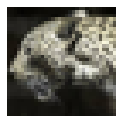

In [8]:
#generating a random number to display a random image from the dataset along with the label's number and name
#setting the figure size
rcParams['figure.figsize'] = 2,2
#generating a random number
imageId = np.random.randint(0, len(X_train))
#showing the image at that id
plt.imshow(X_train[imageId])
#setting display off for the image
plt.axis('off')
#displaying the image id
print("Image number selected : {}".format(imageId))
#displaying the shape of the image
print("Shape of image : {}".format(X_train[imageId].shape))

#displaying the subcategory number
print("Image subcategory number: {}".format(trainData['fine_labels'][imageId]))
#displaying the subcategory name
print("Image subcategory name: {}".format(subCategory.iloc[trainData['fine_labels'][imageId]][0].capitalize()))

In [9]:
winSize = (32,32)
blockSize = (8,8)
blockStride = (4,4)
cellSize = (4,4)
nbins = 9


df = []

**Create Database of HOGs** 
(Pandas dataframe)

In [10]:
for i in range(5000):
    image = cv2.cvtColor(X_train[i],cv2.COLOR_BGR2GRAY)
    hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins)
    df.append(hog.compute(image))
    
DF = pd.DataFrame(df)


In [11]:
DF

,0,1,2,3,4,5,6,7,8,9,...,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763
0,0.032799,0.015301,0.045787,0.000000,0.069334,0.000000,0.000000,0.000000,0.032799,0.067754,...,0.098908,0.316263,0.316263,0.248816,0.060455,0.195416,0.000000,0.025893,0.150303,0.213901
1,0.006916,0.000000,0.000000,0.000000,0.241620,0.000000,0.000000,0.000000,0.006916,0.016505,...,0.000000,0.055166,0.000000,0.000000,0.000000,0.699561,0.000000,0.000000,0.000000,0.055166
2,0.327324,0.175260,0.089584,0.062461,0.073516,0.000000,0.000000,0.000000,0.047610,0.327324,...,0.248223,0.292329,0.292329,0.197667,0.280417,0.292329,0.000000,0.000000,0.000000,0.034408
3,0.097244,0.235721,0.044991,0.010438,0.005530,0.000000,0.000000,0.000000,0.008888,0.155014,...,0.058511,0.069262,0.084507,0.002409,0.000000,0.305709,0.124439,0.305709,0.305709,0.095173
4,0.227998,0.040255,0.278890,0.130381,0.014747,0.007472,0.119501,0.278890,0.096910,0.072541,...,0.261557,0.148019,0.049396,0.163622,0.247557,0.261557,0.261557,0.198627,0.261557,0.261557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.015363,0.097005,0.186929,0.088142,0.090439,0.082905,0.061554,0.160125,0.234682,0.086885,...,0.014750,0.009869,0.093469,0.228540,0.300492,0.300492,0.300492,0.076745,0.024837,0.008814
4996,0.328083,0.026645,0.052272,0.019465,0.080357,0.096609,0.074013,0.087729,0.361276,0.155018,...,0.002208,0.030333,0.162007,0.367222,0.119892,0.049351,0.003128,0.000000,0.000000,0.016392
4997,0.311332,0.014125,0.029702,0.012647,0.063732,0.005488,0.059425,0.275936,0.311332,0.311332,...,0.270229,0.270229,0.208096,0.270229,0.270229,0.270229,0.022291,0.020721,0.019425,0.270229
4998,0.016674,0.019421,0.275457,0.309549,0.274664,0.099642,0.053477,0.004781,0.013891,0.056176,...,0.000000,0.002480,0.009092,0.027854,0.120749,0.355200,0.083245,0.012798,0.000841,0.002480


****continue work checkpoint: standardize test data and proceed****

In [12]:
def predict(img,k):
    
    #Extract sample's features
    
    sample = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins)
    _hog = hog.compute(sample)
    
    #Get Nearest Neighbors
    distances = []
    for i in range(len(DF)):
        distances.append(np.linalg.norm(_hog - DF.iloc[i]))         # 1- Calculate and store each datapoint's Euclidean distance
        
    kNNsID = np.argsort(distances)[:k]                              # 2- Sort distances' IDs in an ascending order
    
    kNNsCats = []
    for i in kNNsID:
        kNNsCats.append(subCategory.iloc[trainData['fine_labels'][i]][0].capitalize())      # 3- Get categories of each of the NNs
    
    CommonCat = Counter(kNNsCats).most_common(1)                    # 4- Count and get Most common category
    
    return CommonCat

In [13]:
n = 25
p = predict(X_test[n], 20)

In [14]:
def getAccuracy(k,x_test,testdata):
    RightCount = 0
    preds = []
    for i in range(1000):
        #print("1")
        pred = predict(x_test[i], k)
        #print("2")
        if pred[0][0] == subCategory.iloc[testdata['fine_labels'][i]][0].capitalize():
            #print("3")
            RightCount+=1
            #print("4")
        print("Done: {}, Accuracy: {}".format(i,(RightCount/(i+1))*100))
        preds.append(pred)
    return preds

In [15]:
Preds14 = getAccuracy(14,X_test,testData)

Done: 0, Accuracy: 0.0
Done: 1, Accuracy: 0.0
Done: 2, Accuracy: 0.0
Done: 3, Accuracy: 0.0
Done: 4, Accuracy: 20.0
Done: 5, Accuracy: 16.666666666666664
Done: 6, Accuracy: 14.285714285714285
Done: 7, Accuracy: 12.5
Done: 8, Accuracy: 11.11111111111111
Done: 9, Accuracy: 10.0
Done: 10, Accuracy: 9.090909090909092
Done: 11, Accuracy: 8.333333333333332
Done: 12, Accuracy: 7.6923076923076925
Done: 13, Accuracy: 7.142857142857142
Done: 14, Accuracy: 13.333333333333334
Done: 15, Accuracy: 12.5
Done: 16, Accuracy: 17.647058823529413
Done: 17, Accuracy: 16.666666666666664
Done: 18, Accuracy: 15.789473684210526
Done: 19, Accuracy: 15.0
Done: 20, Accuracy: 14.285714285714285
Done: 21, Accuracy: 13.636363636363635
Done: 22, Accuracy: 13.043478260869565
Done: 23, Accuracy: 12.5
Done: 24, Accuracy: 12.0
Done: 25, Accuracy: 11.538461538461538
Done: 26, Accuracy: 11.11111111111111
Done: 27, Accuracy: 10.714285714285714
Done: 28, Accuracy: 10.344827586206897
Done: 29, Accuracy: 10.0
Done: 30, Accurac

In [16]:
TruePreds = []

for i in range(1000):
    TruePreds.append(subCategory.iloc[testData['fine_labels'][i]][0].capitalize())

In [17]:
Predicted = []
for i in range(len(Preds14)):
    Predicted.append(Preds14[i][0][0])

In [18]:
cm = confusion_matrix(TruePreds, Predicted)

In [19]:
x = np.array(TruePreds)
len(np.unique(x))

100

In [20]:
cm_df = pd.DataFrame(cm,
                     index = np.unique(x), 
                     columns = np.unique(x))

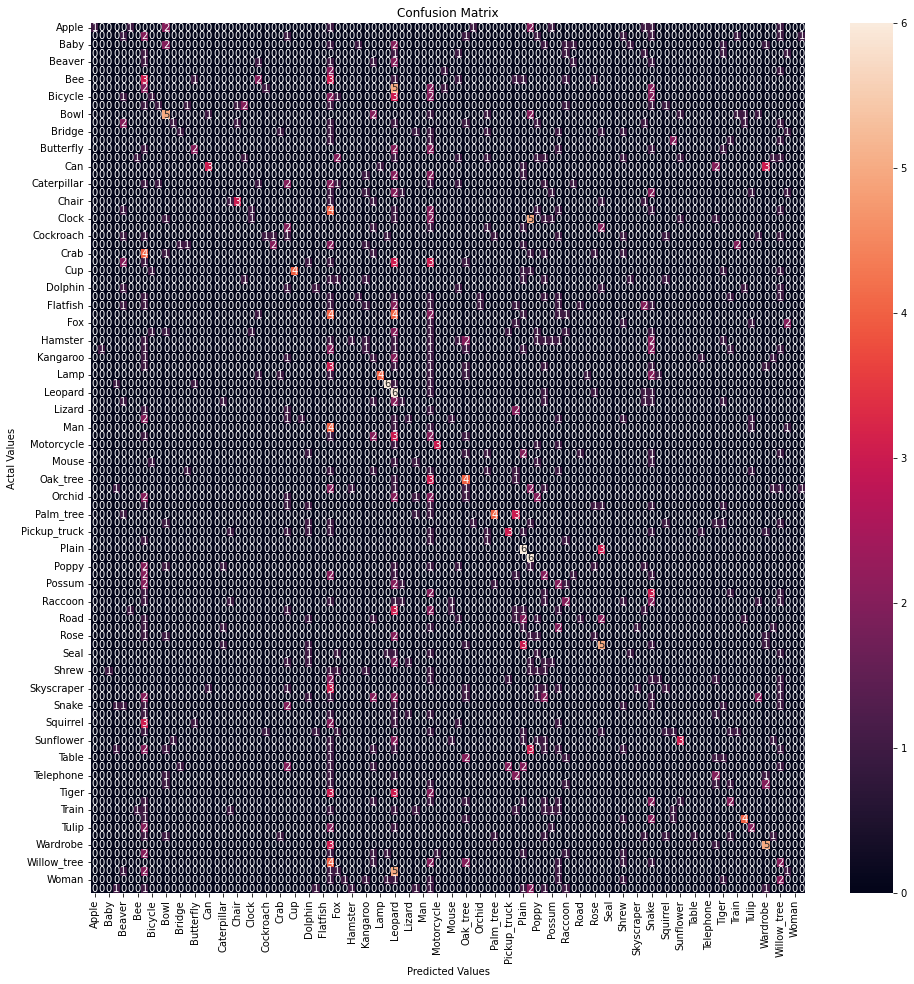

<Figure size 144x144 with 0 Axes>

In [21]:
plt.figure(figsize=(16,16))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig('KNN.png')